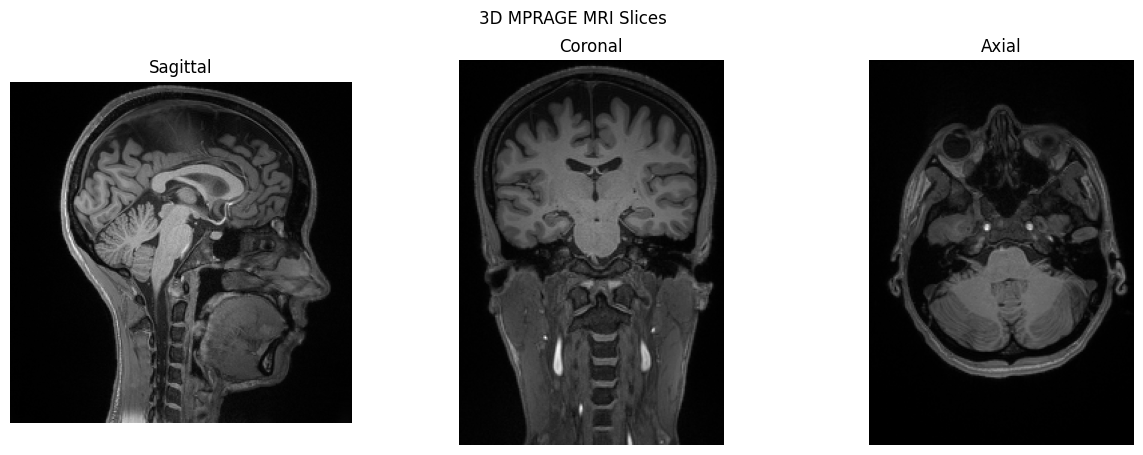

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.fft import fftshift, fft2, ifft2
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib

# Size of the 3D phantom
x_spins = 176
y_spins = 256
z_spins = 256

img = nib.load('mprage.nii')


# Get the data as a NumPy array
mprage = img.get_fdata()

# Create a figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display a slice from each dimension
# The np.flipud function is used to flip the images
axs[0].imshow(np.flipud(mprage[mprage.shape[0] // 2, :, :].T), cmap='gray')
axs[0].set_title('Sagittal')

axs[1].imshow(np.flipud(mprage[:, mprage.shape[1] // 2, :].T), cmap='gray')
axs[1].set_title('Coronal')

axs[2].imshow(np.flipud(mprage[:, :, mprage.shape[2] // 2].T), cmap='gray')
axs[2].set_title('Axial')

# Remove axes for all subplots
for ax in axs:
    ax.axis('off')
    
fig.suptitle('3D MPRAGE MRI Slices')
plt.show()

gamma = 42.58e6  # Gyromagnetic ratio for hydrogen in Hz/T
g_mult = 6 # Gradient multiplication factor
Gx = 0.004755753 * g_mult  # Gradient strength in T/m
Gy = 0.004755753 * g_mult # Gradient strength in T/m
Gz = 0.004755753 * g_mult # Gradient strength in T/m
#B0 = 1.0  # B0 field in T

In [34]:
# Time intervals for the gradients
tau = 2e-3
time_x = np.linspace(-tau/2,tau/2,x_spins)
time_y = np.linspace(-tau/2,tau/2,y_spins)
time_z = np.linspace(-tau/2,tau/2,z_spins)

# B0 field inhomogeneities in the x and y directions

# Gradient fields (assuming same for x and y directions)
Gx_values = time_x * Gx
Gy_values = time_y * Gy
Gz_values = time_z * Gz

# k-space trajectory (assuming same for x and y directions)
kx_values = gamma * Gx_values 
ky_values = gamma * Gy_values
kz_values = gamma * Gz_values



# Plot the k-space values
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(np.abs(k_space), cmap='gray')
axs[0].set_title('k-space')
axs[1].imshow(np.abs(fftshift(k_space)), cmap='gray')
axs[1].set_title('k-space')
axs[2].imshow(np.angle(k_space), cmap='gray')
axs[2].set_title('k-space')
plt.show()


ValueError: operands could not be broadcast together with shapes (1,256,1,1) (176,256,256) 